# Установка переменных

In [405]:
DATASET = "spotify-and-youtube"
DATASET_CSV = "Spotify_Youtube.csv"

DATASET_URL_PATH = f"salvatorerastelli/{DATASET}"
DATASET_CSV_PATH = f"/content/{DATASET_CSV}"

import warnings
warnings.filterwarnings('ignore')

# Настройка kaggle и скачивание датасета

Установить kaggle

In [406]:
!pip install kaggle

Загрузить kaggle.json

In [407]:
from google.colab import files
import os.path

if not os.path.isfile('/root/.kaggle/kaggle.json'):
  files.upload()

  !rm -r ~/.kaggle
  !mkdir ~/.kaggle
  !mv ./kaggle.json ~/.kaggle/
  !chmod 600 ~/.kaggle/kaggle.json

Скачать датасет

In [408]:
!kaggle datasets download {DATASET_URL_PATH} --unzip

  0% 0.00/8.95M [00:00<?, ?B/s]
100% 8.95M/8.95M [00:00<00:00, 128MB/s]


# Обработка датасета

## 0. Задача регрессии аудио композиции
Следует определить численный показатель стримов (условно прослушиваний) отдельно взятой записи по ее числовым и категориальным характеристикам аудио дорожки.

Ссылка на [датасет](https://www.kaggle.com/datasets/salvatorerastelli/spotify-and-youtube/data) - тут можно узнать подробнее про каждый из столбцов.

## 1. Прочитать данные

In [409]:
import pandas as pd
df = pd.read_csv(DATASET_CSV_PATH)
df.drop(columns=df.columns[0], axis=1, inplace=True)
df.head(5)

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20718 non-null  object 
 1   Url_spotify       20718 non-null  object 
 2   Track             20718 non-null  object 
 3   Album             20718 non-null  object 
 4   Album_type        20718 non-null  object 
 5   Uri               20718 non-null  object 
 6   Danceability      20716 non-null  float64
 7   Energy            20716 non-null  float64
 8   Key               20716 non-null  float64
 9   Loudness          20716 non-null  float64
 10  Speechiness       20716 non-null  float64
 11  Acousticness      20716 non-null  float64
 12  Instrumentalness  20716 non-null  float64
 13  Liveness          20716 non-null  float64
 14  Valence           20716 non-null  float64
 15  Tempo             20716 non-null  float64
 16  Duration_ms       20716 non-null  float6

## 2. Основные характеристики и визуализация

<Axes: xlabel='Stream', ylabel='Count'>

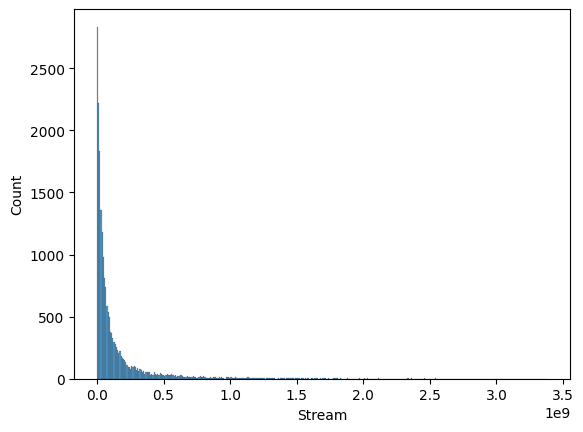

In [411]:
import seaborn as sns
sns.histplot(data=df, x='Stream')

Наблюдаем некоторое количество выбросов после отметки ~1.2 * 10^9 Stream.<br>
И большое Количество околонулевых значений.<br>


Уберем выбросы

In [412]:
# without_categorial = df[['Stream']]
# df = df.loc[list((without_categorial <= without_categorial.quantile(0.98)).all(1)), :]
# sns.histplot(data=df, x='Stream')

In [413]:
df.describe()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,2.071600e+04,2.024800e+04,2.017700e+04,2.014900e+04,2.014200e+04
mean,0.619777,0.635250,5.300348,-7.671680,0.096456,0.291535,0.055962,0.193521,0.529853,120.638340,2.247176e+05,9.393782e+07,6.633411e+05,2.751899e+04,1.359422e+08
std,0.165272,0.214147,3.576449,4.632749,0.111960,0.286299,0.193262,0.168531,0.245441,29.579018,1.247905e+05,2.746443e+08,1.789324e+06,1.932347e+05,2.441321e+08
min,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,0.518000,0.507000,2.000000,-8.858000,0.035700,0.045200,0.000000,0.094100,0.339000,97.002000,1.800095e+05,1.826002e+06,2.158100e+04,5.090000e+02,1.767486e+07
50%,0.637000,0.666000,5.000000,-6.536000,0.050500,0.193000,0.000002,0.125000,0.537000,119.965000,2.132845e+05,1.450110e+07,1.244810e+05,3.277000e+03,4.968298e+07
75%,0.740250,0.798000,8.000000,-4.931000,0.103000,0.477250,0.000463,0.237000,0.726250,139.935000,2.524430e+05,7.039975e+07,5.221480e+05,1.436000e+04,1.383581e+08
max,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


In [414]:
df.corr()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
Danceability,1.000000,0.236596,0.037735,0.353408,0.210376,-0.279435,-0.318611,-0.084482,0.465756,-0.065943,-0.089159,0.088546,0.099396,0.043940,0.073375
Energy,0.236596,1.000000,0.030160,0.744845,0.065319,-0.658304,-0.310058,0.173717,0.389158,0.157383,0.022660,0.067575,0.062824,0.044703,0.044239
Key,0.037735,0.030160,1.000000,0.025266,0.019778,-0.030818,0.000747,-0.011008,0.042559,0.001855,0.003186,0.007767,0.006751,0.007041,-0.006287
Loudness,0.353408,0.744845,0.025266,1.000000,0.033699,-0.547680,-0.545406,0.087062,0.311578,0.144766,0.012063,0.119244,0.124887,0.059626,0.118695
Speechiness,0.210376,0.065319,0.019778,0.033699,1.000000,-0.077598,-0.109895,0.085463,0.059204,0.037553,-0.051248,-0.013240,0.007495,0.008122,-0.016239
Acousticness,-0.279435,-0.658304,-0.030818,-0.547680,-0.077598,1.000000,0.274379,-0.040922,-0.200816,-0.129367,-0.028834,-0.071240,-0.078591,-0.052381,-0.104843
Instrumentalness,-0.318611,-0.310058,0.000747,-0.545406,-0.109895,0.274379,1.000000,-0.060021,-0.269785,-0.076734,-0.007284,-0.078405,-0.078427,-0.031468,-0.091942
Liveness,-0.084482,0.173717,-0.011008,0.087062,0.085463,-0.040922,-0.060021,1.000000,0.031904,0.006670,-0.004970,-0.015715,-0.022740,-0.013046,-0.039617
Valence,0.465756,0.389158,0.042559,0.311578,0.059204,-0.200816,-0.269785,0.031904,1.000000,0.090432,-0.052331,0.035423,0.011864,0.017381,-0.012109
Tempo,-0.065943,0.157383,0.001855,0.144766,0.037553,-0.129367,-0.076734,0.006670,0.090432,1.000000,-0.013660,0.000013,0.003680,0.008420,0.002504


Здесь можем видеть сильную корреляцию между просмотрами клипа на youtube + лайками и количеством прослушиваний. Но эта зависимость более чем очевидна, поэтому некоторые из столбцов будут исключены в будущем.

А также можно заметить среднюю корреляцию: громкость - прослушивания и инструментальность - прослушивания.

Также посмотрим на корреляцию основных числовых характеристик мелодии.

In [415]:
characteristic_columns = df.columns[6:14]
df[characteristic_columns].corr()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness
Danceability,1.000000,0.236596,0.037735,0.353408,0.210376,-0.279435,-0.318611,-0.084482
Energy,0.236596,1.000000,0.030160,0.744845,0.065319,-0.658304,-0.310058,0.173717
Key,0.037735,0.030160,1.000000,0.025266,0.019778,-0.030818,0.000747,-0.011008
Loudness,0.353408,0.744845,0.025266,1.000000,0.033699,-0.547680,-0.545406,0.087062
Speechiness,0.210376,0.065319,0.019778,0.033699,1.000000,-0.077598,-0.109895,0.085463
Acousticness,-0.279435,-0.658304,-0.030818,-0.547680,-0.077598,1.000000,0.274379,-0.040922
Instrumentalness,-0.318611,-0.310058,0.000747,-0.545406,-0.109895,0.274379,1.000000,-0.060021
Liveness,-0.084482,0.173717,-0.011008,0.087062,0.085463,-0.040922,-0.060021,1.000000


Так же посмотрим на характеристику соотношения лайков к просмотрам видео на youtube к количеству прослушиваний.

<Axes: xlabel='Stream', ylabel='like_per_view'>

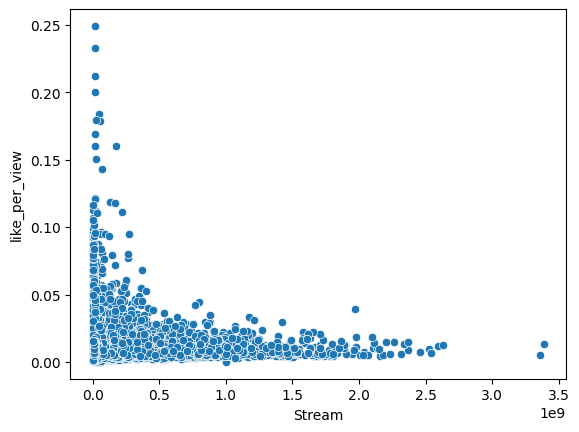

In [416]:
df['like_per_view'] = df['Likes'] / df['Views']
sns.scatterplot(data=df, x='Stream', y='like_per_view')

Можем сделать вывод, что основная масса слушателей игнорируют возможность использования отметки "нравится".

## 3. Обработать пропущенные и лишние значения

In [417]:
df.isnull().sum()

Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
like_per_view       542
dtype: int64

Пропущенные значения присутствуют в относительно небольшом проценте записей.<br>
Удалим все строки, содержащие хотя бы одно пустое значение.

In [418]:
df = df.dropna()
df = df.reset_index(drop=True)

Также удалим лишние колонки, которые не будут использованы при обучении модели.

In [419]:
df = df.drop(df.columns[0:6], axis=1)
df = df.drop(df.columns[10:13], axis=1)
df = df.drop('Description', axis=1)
df = df.drop('Channel', axis=1)
df = df.drop('like_per_view', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19170 entries, 0 to 19169
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Danceability      19170 non-null  float64
 1   Energy            19170 non-null  float64
 2   Key               19170 non-null  float64
 3   Loudness          19170 non-null  float64
 4   Speechiness       19170 non-null  float64
 5   Acousticness      19170 non-null  float64
 6   Instrumentalness  19170 non-null  float64
 7   Liveness          19170 non-null  float64
 8   Valence           19170 non-null  float64
 9   Tempo             19170 non-null  float64
 10  Views             19170 non-null  float64
 11  Likes             19170 non-null  float64
 12  Comments          19170 non-null  float64
 13  Licensed          19170 non-null  object 
 14  official_video    19170 non-null  object 
 15  Stream            19170 non-null  float64
dtypes: float64(14), object(2)
memory usage: 

In [420]:
# sns.pairplot(data=df[characteristic_columns])

## 4. Обработать категориальные признаки

In [421]:
df_categorical = pd.get_dummies(df[['Licensed', 'official_video', 'Key']], columns=['Licensed', 'official_video', 'Key'])
df_not_categorical = df.drop(columns=['Licensed', 'official_video', 'Key'])
df_processed = pd.merge(df_not_categorical, df_categorical, left_index=True, right_index=True)
df_processed

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Views,...,Key_2.0,Key_3.0,Key_4.0,Key_5.0,Key_6.0,Key_7.0,Key_8.0,Key_9.0,Key_10.0,Key_11.0
0,0.818,0.705,-6.679,0.1770,0.008360,0.002330,0.6130,0.7720,138.559,693555221.0,...,0,0,0,0,1,0,0,0,0,0
1,0.676,0.703,-5.815,0.0302,0.086900,0.000687,0.0463,0.8520,92.761,72011645.0,...,0,0,0,0,0,0,1,0,0,0
2,0.695,0.923,-3.930,0.0522,0.042500,0.046900,0.1160,0.5510,108.014,8435055.0,...,0,0,0,0,0,0,0,0,0,0
3,0.689,0.739,-5.810,0.0260,0.000015,0.509000,0.0640,0.5780,120.423,211754952.0,...,1,0,0,0,0,0,0,0,0,0
4,0.663,0.694,-8.627,0.1710,0.025300,0.000000,0.0698,0.5250,167.953,618480958.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19165,0.582,0.926,-6.344,0.0328,0.448000,0.000000,0.0839,0.6580,90.002,71678.0,...,0,0,0,1,0,0,0,0,0,0
19166,0.531,0.936,-1.786,0.1370,0.028000,0.000000,0.0923,0.6570,174.869,164741.0,...,0,0,1,0,0,0,0,0,0,0
19167,0.443,0.830,-4.679,0.0647,0.024300,0.000000,0.1540,0.4190,168.388,35646.0,...,0,0,1,0,0,0,0,0,0,0
19168,0.417,0.767,-4.004,0.4190,0.356000,0.018400,0.1080,0.5390,155.378,6533.0,...,0,0,0,0,0,0,0,1,0,0


## 5. Провести нормализацию

In [422]:
from sklearn import preprocessing

columns_to_normalize = ['Views', 'Tempo', 'Likes', 'Comments']

df_not_norm = df_processed.drop(columns=columns_to_normalize, axis=1)
df_norm = df_processed[columns_to_normalize]
df_norm_raw = preprocessing.MinMaxScaler().fit_transform(df_norm.values)

n = pd.DataFrame(df_norm_raw, columns=df_norm.columns)

df_processed_and_normalized = pd.merge(df_not_norm, n, left_index=True, right_index=True)

## 6. Разбить данные на обучающую и тестовую выборки

In [423]:
X = df_processed_and_normalized.drop('Stream', axis=1)
y = df_processed_and_normalized['Stream']

In [424]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

## 7. Запустить регрессию

In [425]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression().fit(X_train, y_train)
print(f'Linear score: {lin_reg.score(X_test, y_test)}')

Linear score: 0.470239659738818


In [426]:
from numpy import arange
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
ridge_reg = RidgeCV(alphas=arange(0.1, 1, 0.1), cv=cv, scoring='neg_mean_absolute_error')
ridge_reg.fit(X_train, y_train)
print(f'Ridge score: {ridge_reg.score(X_test, y_test)}')

Ridge score: 0.4701119702232225


In [427]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
lasso_reg = LassoCV(alphas=arange(0.1, 1, 0.1), cv=cv)
lasso_reg.fit(X_train, y_train)
print(f'Lasso score: {lasso_reg.score(X_test, y_test)}')

Lasso score: 0.47023969711515334


# Вывод
После проведения процесса предобработки данных и обучения разных моделей метода линейной регрессии имеем следующее: все выбранные модели показали результат "угадывания" примерно равный 50% процентам.<br>

Это значит, что каждая из моделей может с ~50% шансом предугадать количество прослушиваний композиции на основе характеристик аудио дорожки и дополнительных характеристик (такие как наличие клипа на youtube).

Такой "средний" результат предсказывания можно объяснить тем, что успех отдельного трека зависит от множества факторов, включая те, которые не были представлены в исходных данных и те, которые были выброшены из них из-за невозможности классификации.